Dataset original : (27455, 28, 28, 1)


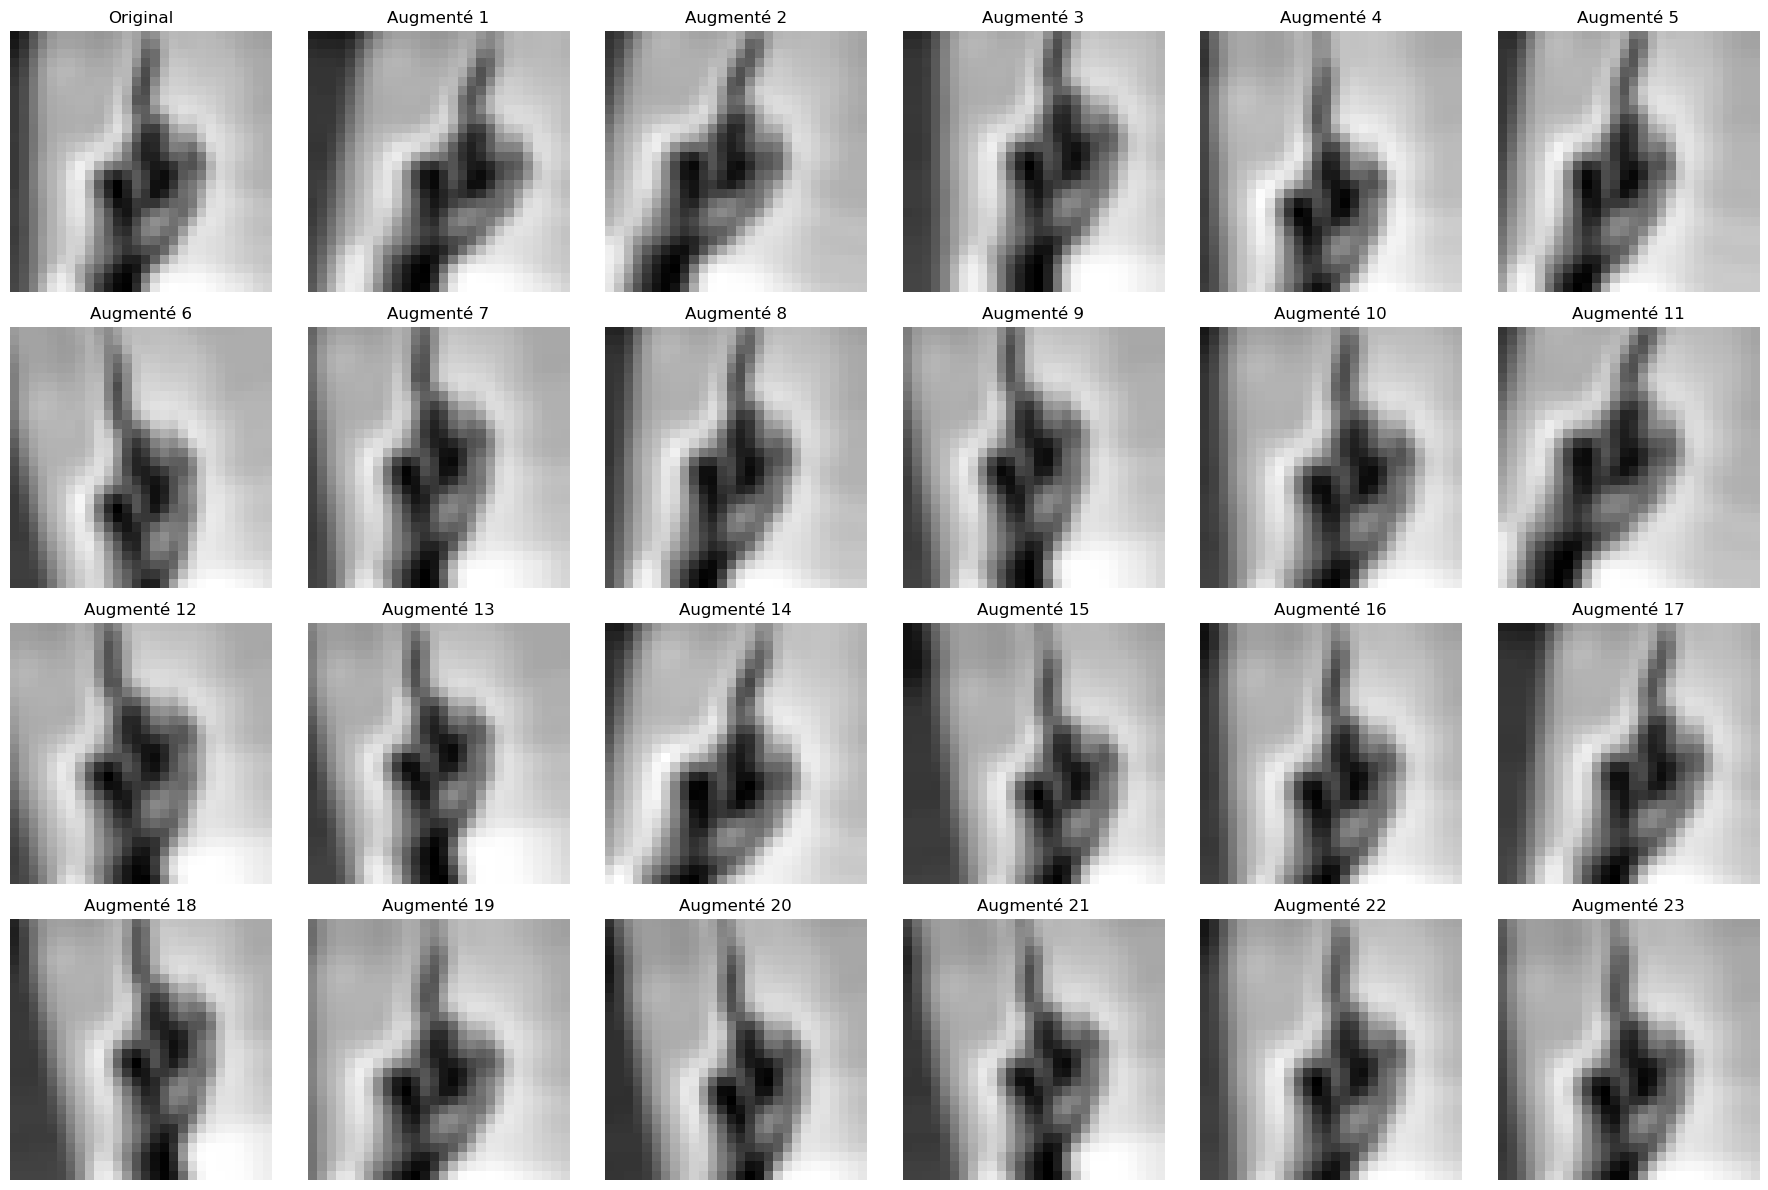

✅ L'augmentation sera appliquée pendant l'entraînement
📌 Nous utiliserons ImageDataGenerator avec fit_generator()


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Charger les données prétraitées
X_train = np.load('data/processed/X_train.npy')
y_train = np.load('data/processed/y_train.npy')

print(f"Dataset original : {X_train.shape}")

# Configuration de l'augmentation
datagen = ImageDataGenerator(
    rotation_range=15,           # Rotation ±15 degrés
    width_shift_range=0.1,       # Décalage horizontal 10%
    height_shift_range=0.1,      # Décalage vertical 10%
    shear_range=0.1,             # Cisaillement
    zoom_range=0.1,              # Zoom ±10%
    horizontal_flip=False,       # Pas de flip (change le sens du geste!)
    fill_mode='nearest'          # Remplissage des pixels manquants
)

datagen.fit(X_train)

# Visualiser l'augmentation
fig, axes = plt.subplots(4, 6, figsize=(18, 12))

# Image originale
original_img = X_train[0]
axes[0, 0].imshow(original_img[:, :, 0], cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

# Générer 23 variations
aug_iter = datagen.flow(original_img.reshape(1, 28, 28, 1), batch_size=1)
for i in range(1, 24):
    row = i // 6
    col = i % 6
    augmented = next(aug_iter)[0]
    axes[row, col].imshow(augmented[:, :, 0], cmap='gray')
    axes[row, col].set_title(f'Augmenté {i}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.savefig('results/plots/data_augmentation_examples.png', dpi=150)
plt.show()

print("✅ L'augmentation sera appliquée pendant l'entraînement")
print("📌 Nous utiliserons ImageDataGenerator avec fit_generator()")